## **😀경제지표에 따른 전국 교통량 예측하기😀**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

In [4]:
data=pd.read_csv("../00_Data/Integrated_data/Fully_integrated_data.csv",encoding="utf-8")
data.head()

,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,44465366.00,44.700000,41981323.00,13.600000,90.448000,1814.57,1611.14,18409608
1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,44269519.60,43.775943,41799132.37,13.521635,90.397806,1815.24,1611.79,18398782
2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,44073673.20,42.851885,41616941.74,13.443269,90.347613,1816.15,1612.85,18387956
3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,43877826.79,41.927828,41434751.11,13.364904,90.297419,1817.48,1614.02,18377130
4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,43681980.39,41.003771,41252560.48,13.286539,90.247226,1818.53,1615.00,18366304


In [5]:
# 필요한 컬럼 선택
features = data[['number of car ownership', 'Import growth rate', 'Export growth rate', 'Total Traffic Volume']]

In [6]:
# 결측치 중앙값으로 대체
features.fillna(features.median(), inplace=True)

C:\Users\jinsung\AppData\Local\Temp\ipykernel_16996\3991637398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.median(), inplace=True)


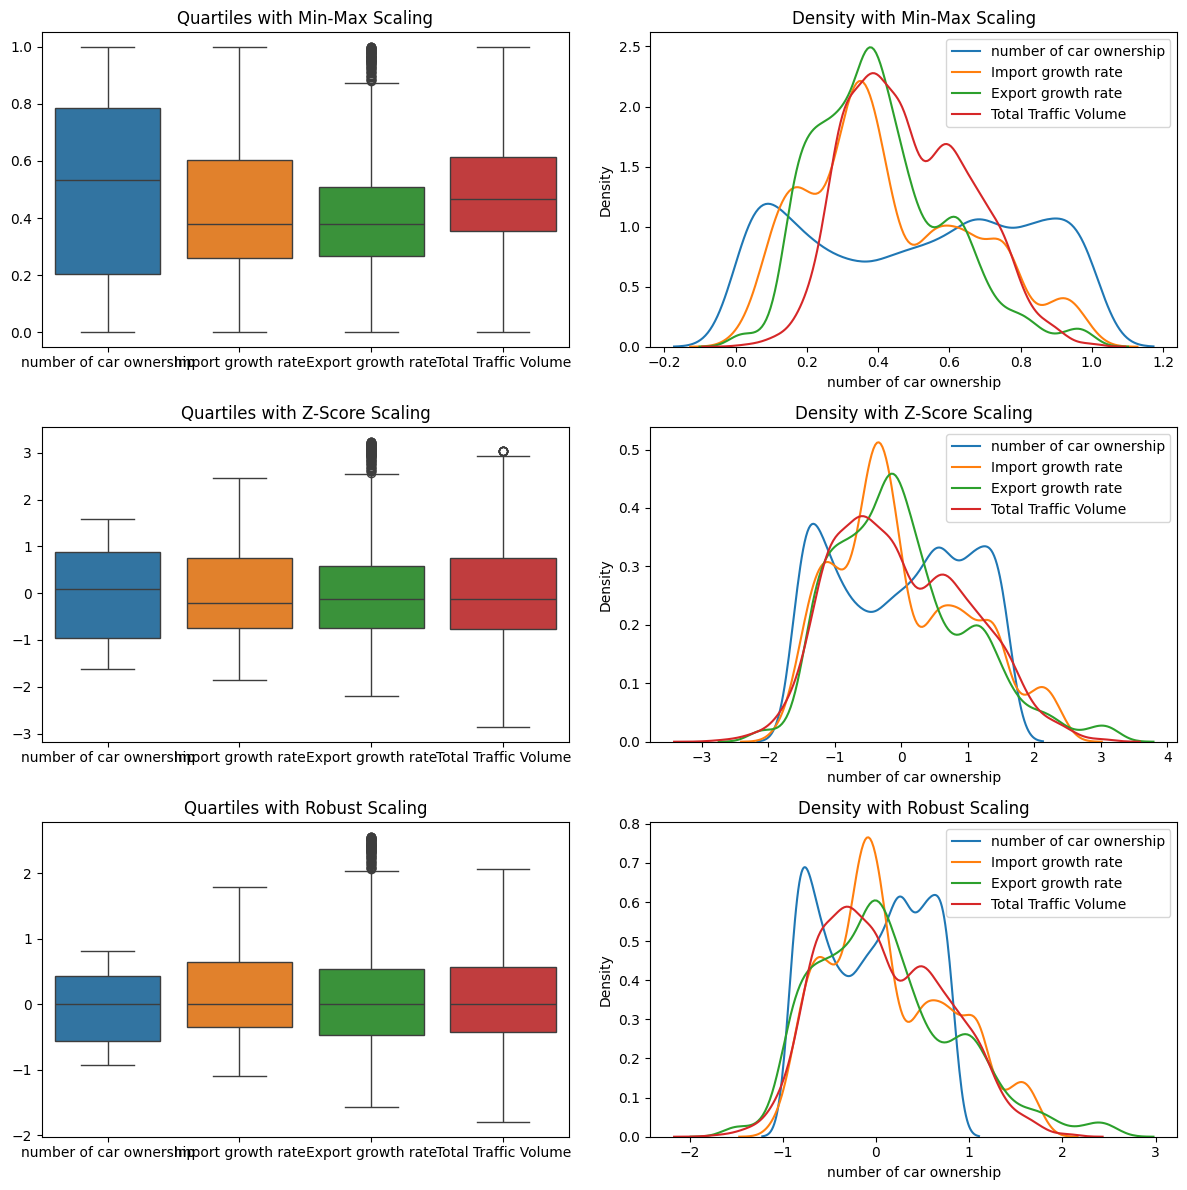

In [7]:
# 스케일러 초기화
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Z-Score Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler(),
    'Vector Normalization': Normalizer(norm='l2')
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled_data[name] = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 시각화
fig, axes = plt.subplots(nrows=len(scalers)-1, ncols=2, figsize=(12, 12))  # Normalizer는 3D로 따로 그립니다.
for i, (name, data_scaled) in enumerate(scaled_data.items()):
    if name != 'Vector Normalization':
        # Boxplot for quartiles
        sns.boxplot(data=data_scaled, ax=axes[i, 0])
        axes[i, 0].set_title(f'Quartiles with {name}')
        
        # KDE plot for density
        for column in features.columns:
            sns.kdeplot(data_scaled[column], ax=axes[i, 1], label=column)
        axes[i, 1].set_title(f'Density with {name}')
        axes[i, 1].legend()

plt.tight_layout()

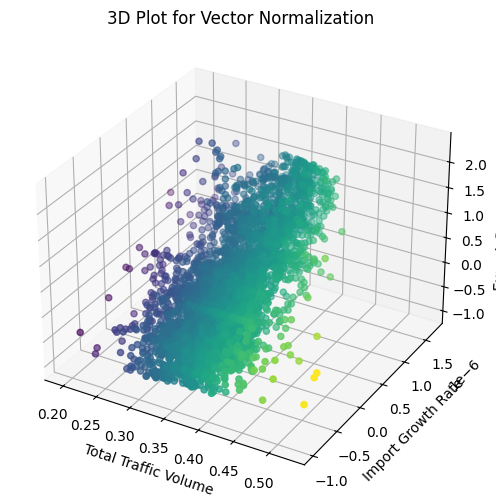

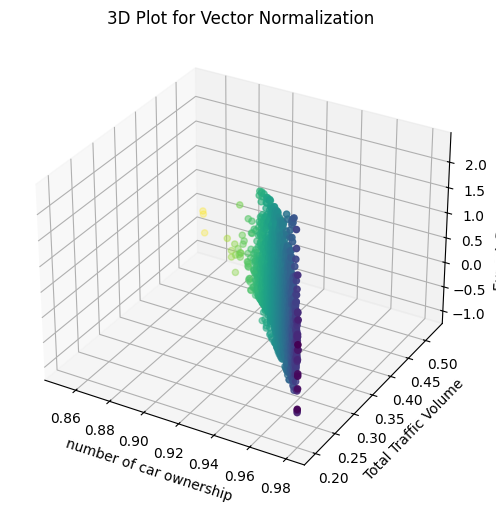

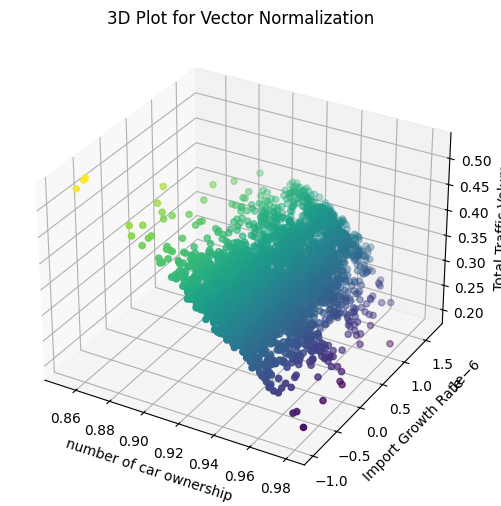

In [10]:
['number of car ownership', 'Import growth rate', 'Export growth rate', 'Total Traffic Volume']

# 3D plot for Vector Normalization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
normalized_data = scaled_data['Vector Normalization']
ax.scatter(normalized_data.iloc[:, 3], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=normalized_data.iloc[:, 3], cmap='viridis')
ax.set_xlabel('Total Traffic Volume')
ax.set_ylabel('Import Growth Rate')
ax.set_zlabel('Export Growth Rate')
ax.set_title('3D Plot for Vector Normalization')
plt.show()

# 3D plot for Vector Normalization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
normalized_data = scaled_data['Vector Normalization']
ax.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 3], normalized_data.iloc[:, 2], c=normalized_data.iloc[:, 3], cmap='viridis')
ax.set_xlabel('number of car ownership')
ax.set_ylabel('Total Traffic Volume')
ax.set_zlabel('Export Growth Rate')
ax.set_title('3D Plot for Vector Normalization')
plt.show()

# 3D plot for Vector Normalization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
normalized_data = scaled_data['Vector Normalization']
ax.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 3], c=normalized_data.iloc[:, 3], cmap='viridis')
ax.set_xlabel('number of car ownership')
ax.set_ylabel('Import Growth Rate')
ax.set_zlabel('Total Traffic Volume')
ax.set_title('3D Plot for Vector Normalization')
plt.show()